<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# 📝  Project1

## **파일 가져오기 및 import**

In [2]:
import pandas as pd
import numpy as np
import re
from google.colab import files
import io
import matplotlib.pyplot as plt 
import random
import seaborn as sns

In [4]:
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [5]:
df = pd.read_csv('vgames2.csv',index_col=0)

In [12]:
df.head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0


Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

## **전처리**

---



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


###**발견된 문제 **
1. `Platform` 에서 지원 플랫폼 명이 숫자인 데이터가 존재한다.
  
  -> 행을 모두 **제거한다.**
2. `Year` 에서 데이터가 N/A 인 데이터가 존재한다.
 
  -> 문자열인 듯 하였으나 다른 문제로 인해 문자열처럼 출력되는 현상이었다. **제거한다**.
3. `Year` 에서 연도숫자의 범위가 아닌 데이터가 존재한다. 
  
  -> 1950년 ~ 2050년 범위 이외의 데이터는 모두 **제거한다. **

  -> 자료형을 int로 교체한다.

4. `Genre, Publisher`가 공백인 데이터가 존재한다.

  -> 데이터를 모두 **제거한다.**

5. `Publisher` 이름이 숫자형인 데이터가 존재한다. 

  -> 이름이 숫자만 있는 행은 **제거한다.**

6. `Sales` 데이터들에서 K,M 등 값들의 단위가 중구난방이다.

  -> 모든 단위를 M 단위로 **통일한다**. 단위 표시가 없는 값은 모두 M으로 가정한다.

  -> 480K는 0.48 로 나타낸다. 4100K는 4.1 로 나타낸다.

  -> 숫자에 M,K가 붙은 경우 떼버린다.

  -> 자료형을 float로 교체한다.

7. 기종이 없이 밀려적혀 결측값이 존재하는 값이 존재한다.

  -> 제거한다.

**1.** Platform 에서 지원 플랫폼 명이 숫자인 데이터가 존재한다.

In [7]:
DF = df.copy() # 원본 데이터 수정 방지

In [8]:
NotPlatform = df[~df['Platform'].str.contains(r'[A-Za-z]')].index # 알파벳을 포함하지 않는 데이터 제거

In [9]:
DF = DF.drop(NotPlatform).reset_index(drop = True)

**2.** Year 에서 데이터가 N/A 인 데이터가 존재한다. 

**3.** 연도숫자의 범위가 아닌 데이터가 존재한다.

In [10]:
valid_Year = "Year>1950 & Year<2050"
DF = DF.query(valid_Year)

In [11]:
DF.Year = DF.Year.astype('int')  # int형으로 변경

**4.** 장르,퍼블리셔가 공백인 데이터가 존재한다.

In [12]:
DF.isnull().sum()

Name            0
Platform        0
Year            0
Genre          49
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [13]:
DF = DF.dropna()


In [14]:
DF = DF.reset_index()

**5.** `Publisher` 이름이 숫자형인 데이터가 존재한다. 

In [15]:
NotPub = DF[~DF['Publisher'].str.contains(r'[A-Za-z]')].index # 알파벳을 포함하지 않는 데이터 제거

In [16]:
NotPub # 없으니 pass 중간에 제거된듯

Int64Index([], dtype='int64')

In [17]:
DF.info() # 현재 상황

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16026 entries, 0 to 16025
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        16026 non-null  int64 
 1   Name         16026 non-null  object
 2   Platform     16026 non-null  object
 3   Year         16026 non-null  int64 
 4   Genre        16026 non-null  object
 5   Publisher    16026 non-null  object
 6   NA_Sales     16026 non-null  object
 7   EU_Sales     16026 non-null  object
 8   JP_Sales     16026 non-null  object
 9   Other_Sales  16026 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.2+ MB


6.`Sales` 데이터들에서 K,M 등 값들의 단위가 중구난방이다.

-> 모든 단위를 M 단위로 통일한다.

-> 480K는 0.48 로 나타낸다. 4100K는 4.1 로 나타낸다.

-> 숫자에 M,K가 붙은 경우 떼버린다.

-> 자료형을 float로 교체한다.

In [39]:
def gett_value(DF,Sales):
  if DF[DF['Sales'].str.contains('K')]:
    DF = DF[DF['Sales'].str.replace('K','').astype('float')]
  return DF/1000

In [57]:
# file export
file_name = 'sample1.csv'
# saving the excelsheet
DF.to_csv(file_name, index=False)

In [4]:
uploaded = files.upload()

Saving sample3.csv to sample3.csv


In [5]:
DF = pd.read_csv('sample3.csv',index_col=0)

**7.** 결측치 제거

In [6]:
DF['Other_Sales'][DF['Other_Sales'].isnull()]

index
7531    NaN
16064   NaN
Name: Other_Sales, dtype: float64

In [7]:
DF = DF.dropna().reset_index(drop=True)

In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16024 entries, 0 to 16023
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16024 non-null  object 
 1   Platform     16024 non-null  object 
 2   Year         16024 non-null  object 
 3   Genre        16024 non-null  object 
 4   Publisher    16024 non-null  object 
 5   NA_Sales     16024 non-null  float64
 6   EU_Sales     16024 non-null  float64
 7   JP_Sales     16024 non-null  float64
 8   Other_Sales  16024 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.1+ MB


In [10]:
DF

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16019,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16020,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16021,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16022,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## **1. 지역에 따라서 선호하는 게임 장르가 다를까?**

In [250]:
DF.groupby('Genre')['NA_Sales'].sum()

Genre
Action          831.33
Adventure       100.95
Fighting        219.39
Misc            390.95
Platform        430.08
Puzzle          108.28
Racing          351.39
Role-Playing    307.08
Shooter         549.48
Simulation      180.62
Sports          662.19
Strategy         67.82
Name: NA_Sales, dtype: float64

In [251]:
NA_ratio = DF.groupby('Genre')['NA_Sales'].sum()
NA_ratio = NA_ratio.sort_values(ascending=False)

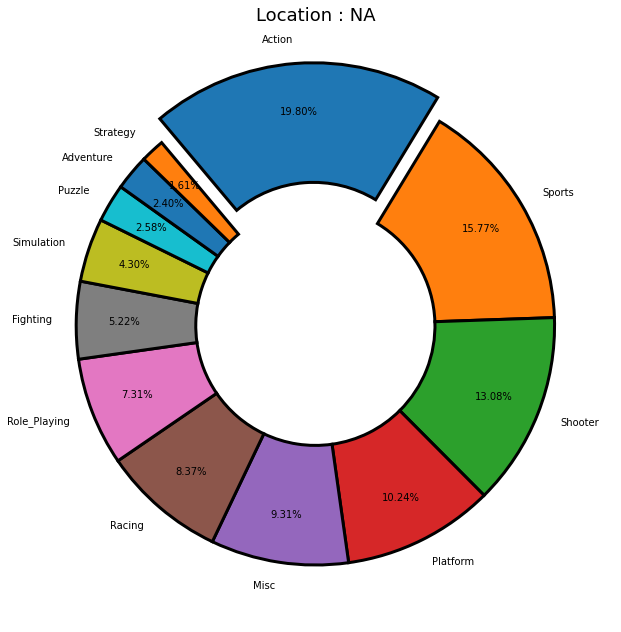

In [252]:
Action = NA_ratio.iloc[0]
Sports = NA_ratio.iloc[1]
Shooter = NA_ratio.iloc[2]
Platform = NA_ratio.iloc[3]
Misc = NA_ratio.iloc[4]
Racing = NA_ratio.iloc[5]
Role_Playing = NA_ratio.iloc[6]
Fighting = NA_ratio.iloc[7]
Simulation = NA_ratio.iloc[8]
Puzzle = NA_ratio.iloc[9]
Adventure = NA_ratio.iloc[10]
Strategy = NA_ratio.iloc[11]

ratio = [Action,Sports,Shooter,Platform,Misc,Racing,Role_Playing,
         Fighting,Simulation,Puzzle,Adventure,Strategy]
labels = ['Action','Sports','Shooter','Platform','Misc','Racing','Role_Playing',
         'Fighting','Simulation','Puzzle','Adventure','Strategy']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : NA", fontsize=18)

plt.show()


In [253]:
EU_ratio = DF.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)

In [254]:
EU_ratio

Genre
Action          561.00
Sports          369.57
Shooter         305.95
Racing          234.07
Misc            207.30
Platform        198.68
Role-Playing    176.31
Simulation      112.66
Fighting         99.68
Adventure        63.30
Puzzle           49.59
Strategy         44.70
Name: EU_Sales, dtype: float64

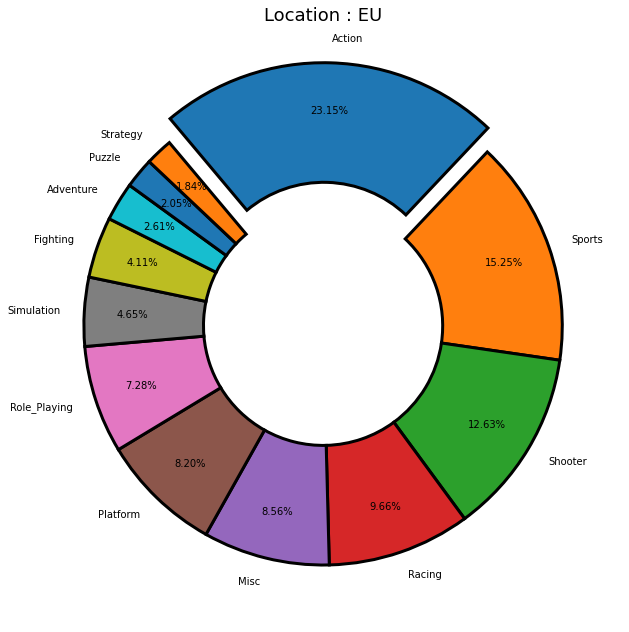

In [255]:
Action = EU_ratio.iloc[0]
Sports = EU_ratio.iloc[1]
Shooter = EU_ratio.iloc[2]
Racing = EU_ratio.iloc[3]
Misc = EU_ratio.iloc[4]
Platform = EU_ratio.iloc[5]
Role_Playing = EU_ratio.iloc[6]
Simulation = EU_ratio.iloc[7]
Fighting = EU_ratio.iloc[8]
Adventure = EU_ratio.iloc[9]
Puzzle = EU_ratio.iloc[10]
Strategy = EU_ratio.iloc[11]

ratio = [Action,Sports,Shooter,Racing,Misc,Platform,Role_Playing,
         Simulation,Fighting,Adventure,Puzzle,Strategy]
labels = ['Action','Sports','Shooter','Racing','Misc','Platform','Role_Playing',
         'Simulation','Fighting','Adventure','Puzzle','Strategy']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : EU", fontsize=18)

plt.show()

In [256]:
NA_ratio = DF.groupby('Genre')['NA_Sales'].sum()
NA_ratio = NA_ratio.sort_values(ascending=False)

In [257]:
JP_ratio = DF.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)

In [258]:
JP_ratio

Genre
Role-Playing    336.25
Action          167.61
Sports          134.58
Platform        129.22
Misc            103.71
Fighting         86.39
Simulation       63.46
Puzzle           56.19
Racing           55.42
Adventure        51.67
Strategy         48.13
Shooter          37.34
Name: JP_Sales, dtype: float64

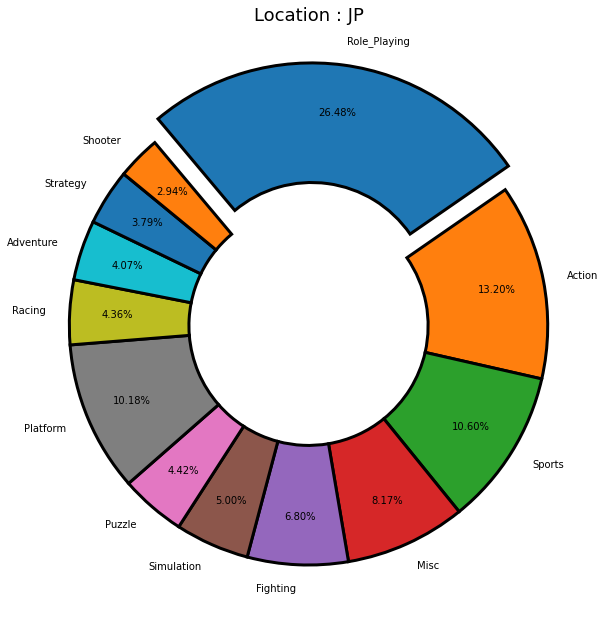

In [259]:
Role_Playing = JP_ratio.iloc[0]
Action = JP_ratio.iloc[1]
Sports = JP_ratio.iloc[2]
Platform = JP_ratio.iloc[3]
Misc = JP_ratio.iloc[4]
Fighting = JP_ratio.iloc[5]
Simulation = JP_ratio.iloc[6]
Puzzle = JP_ratio.iloc[7]
Racing = JP_ratio.iloc[8]
Adventure = JP_ratio.iloc[9]
Strategy = JP_ratio.iloc[10]
Shooter = JP_ratio.iloc[11]

ratio = [Role_Playing,Action,Sports,Misc,Fighting,Simulation,Puzzle,Platform,
         Racing,Adventure,Strategy,Shooter]
labels = ['Role_Playing','Action','Sports','Misc','Fighting','Simulation',
          'Puzzle','Platform',
         'Racing','Adventure','Strategy','Shooter']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : JP", fontsize=18)

plt.show()

In [260]:
Other_ratio = DF.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False)

In [261]:
Other_ratio

Genre
Action          183.43
Sports          131.71
Shooter         100.58
Racing           76.22
Misc             72.51
Role-Playing     54.71
Platform         50.99
Simulation       41.23
Fighting         36.09
Adventure        16.64
Puzzle           12.24
Strategy         11.20
Name: Other_Sales, dtype: float64

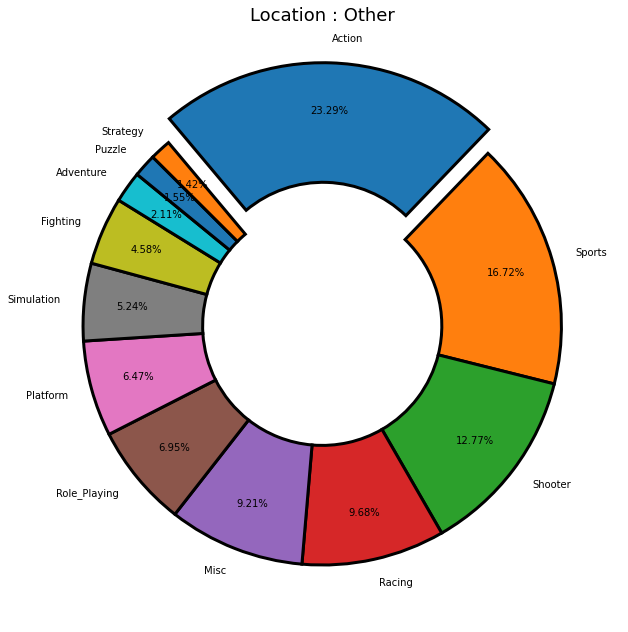

In [262]:
Action = Other_ratio.iloc[0]
Sports = Other_ratio.iloc[1]
Shooter = Other_ratio.iloc[2]
Racing = Other_ratio.iloc[3]
Misc = Other_ratio.iloc[4]
Role_Playing = Other_ratio.iloc[5]
Platform = Other_ratio.iloc[6]
Simulation = Other_ratio.iloc[7]
Fighting = Other_ratio.iloc[8]
Adventure = Other_ratio.iloc[9]
Puzzle = Other_ratio.iloc[10]
Strategy = Other_ratio.iloc[11]

ratio = [Action,Sports,Shooter,Racing,Misc,Role_Playing,Platform,Simulation,
Fighting,Adventure,Puzzle,Strategy]
labels = ['Action','Sports','Shooter','Racing','Misc','Role_Playing','Platform',
          'Simulation',
'Fighting','Adventure','Puzzle','Strategy']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : Other", fontsize=18)

plt.show()

**대부분의 지역에서 액션, 스포츠, 슈팅게임의 판매순위가 높았으나** 

**유독 일본에서만은 롤플레잉 게임이 압도적 강세를 보이며 슈팅게임은 인기가 없는 것으로 나타났다.**

## **2. 연도별 게임의 트렌드가 있을까?**

트렌드 = 유행. 

소비자입장에서 연도별로 유행한 게임장르가 있을 것이고, 게임업체 입장에서 유행한 게임이 있을 것이며 아마 둘 사이에 유의미한 정비례 관계가 있을것이라고 예상. 

소비자가 특정 장르의 게임을 많이 사게되면 업체에서도 동일 장르의 게임을 만들게 될 것이기 때문


In [151]:
released = DF.groupby('Year')['Genre'].value_counts() # 각 년도별 발매 장르의 갯수

In [152]:
released=released.unstack('Genre').fillna(0).astype('int') # 발매안된 부분은 0으로 채우고 unstack
                                                           # index = Year

In [285]:
released.columns

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [288]:
released.rename(columns={'Role-Playing':'Role_Playing'},inplace=True)

In [291]:
released

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1983,0,0,0,1,4,0,0,0,0,0,1,0
1984,1,0,0,1,1,3,2,0,3,0,2,0
1985,2,0,1,0,4,3,0,0,1,1,1,0
1986,6,0,0,0,5,0,1,1,3,0,2,0
1987,0,1,2,0,2,0,0,3,0,0,2,0
1988,1,0,0,0,4,1,1,3,0,1,2,0
1989,1,0,0,1,3,4,0,2,1,0,3,0
1990,3,0,0,0,3,2,2,2,0,1,3,0
1991,5,2,1,1,6,4,1,5,3,2,7,4


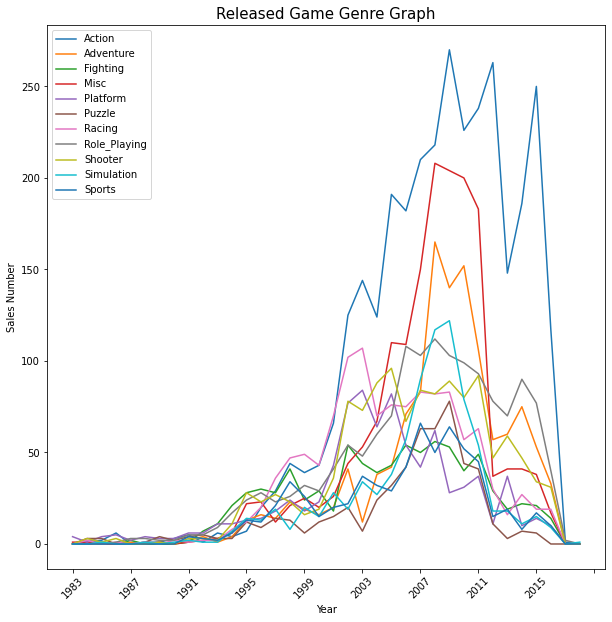

In [303]:
'''
한꺼번에 그리면 범례가 10개가 넘어갔을 경우 색이 같은 패턴이 반복되는데
색깔 분리를 해보려고 했으나, 결국 노가다 밖에 방법을 모르겠다..,
'''
plt.figure(figsize=(10, 10))
plt.plot(released.index,released.Action)
plt.plot(released.index,released.Adventure)
plt.plot(released.index,released.Fighting)
plt.plot(released.index,released.Misc)
plt.plot(released.index,released.Platform)
plt.plot(released.index,released.Puzzle)
plt.plot(released.index,released.Racing)
plt.plot(released.index,released.Role_Playing)
plt.plot(released.index,released.Shooter)
plt.plot(released.index,released.Simulation)
plt.plot(released.index,released.Strategy)

plt.title('Released Game Genre Graph',fontsize=15)

plt.xticks(np.arange(0,40,4),rotation=45)
plt.xlabel('Year')
plt.ylabel('Sales Number')
plt.legend(released,loc='upper left')
plt.show()

업체들의 장르별 출고량을 보았을 때, 

1991년 까지는 유의미한 차이없이 비등비등한 모습을 보여주다가 
1995년부터 격투게임, 롤플레잉게임, 슈팅게임이 강세를 보인다.

2000년도부터는 레이싱게임, 액션게임이 많이 출시되었고, 

2005년도부터는 전체적으로 출고량이 굉장히 늘어남과 동시에 특히 액션게임의 압도적 강세를 볼 수 있다. 

또한 어드벤쳐, 시뮬레이션,슈팅게임,기타장르의 출고가 눈에띄게 늘어나고 레이싱게임이 서서히 줄어들기 시작한다.

2011년도 부터는 모든 장르의 게임의 출고가 급격하게 줄어들지만, 

액션게임은 비교적 그 감소폭이 적고 2017년 무렵에 다시 고점을 찍었던 2008년도 수준의 출고량으로 회복한다.

나머지 게임들도 2017년 무렵 다시 반등하지만 예년에 비하면 한참 미치지 못하는 수준의 출고량을 보여주어 게임시장이 상당히 위축되었다고 판단된다.



In [ ]:
DF.groupby('Year')['Genre'].value_counts()

In [ ]:
Trend = NA_ratio.sort_values(ascending=False)

 ## **3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

주어진 자료에서 얼마나 각 업체가 얼마나 제품을 출고했는지는 주어진 자료에 나와있지 않기때문에, 

출고량은 판매량과 같다고 할 수는 없으나 여기에서는 출고한 제품이 모두 팔렸다는 가정하에 

최종 판매량으로 출고량을 추정하기로 한다.

**같은 게임이라면 출고 플랫폼이 다르다고해서 다른 게임으로 취급하지 않게 주의한다.**

In [130]:
DF2 = DF.copy() #훼손 방지

In [131]:
# sum_Sales = 각 행의 모든 판매량의 합
DF2['sum_Sales'] = DF2['NA_Sales'] + DF2['EU_Sales']+ DF2['JP_Sales']+ DF2['Other_Sales'] 

In [ ]:
#NA_ratio = DF.groupby('Genre')['NA_Sales'].sum()
#NA_ratio = NA_ratio.sort_values(ascending=False)

In [133]:
DF2.sort_values('sum_Sales',ascending=False) # 다른 사향 고려없이 단순 판매량 순으로 나열한 결과

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_Sales
2814,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
132,Warriors Orochi 3,PS4,2014,Action,Tecmo Koei,0.04,50.00,0.04,0.02,50.10
4057,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12157,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3242,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
...,...,...,...,...,...,...,...,...,...,...
3440,Norn + Nonette: Last Era,PSV,2015,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
3446,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
3451,Hyperdimension Neptunia mk2,PS3,2011,Action,Nippon Ichi Software,0.00,0.01,0.00,0.00,0.01
9252,XI Coliseum,PSP,2006,Puzzle,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01


In [140]:
DF2.sort_values('Name',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_Sales
207,¡Shin Chan Flipa en colores!,DS,2007,Platform,505 Games,0.00,0.00,0.14,0.00,0.14
2961,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00,0.02
14515,uDraw Studio: Instant Artist,Wii,2011,Misc,THQ,0.08,0.09,0.00,0.02,0.19
13491,uDraw Studio,Wii,2010,Misc,THQ,1.67,0.58,0.00,0.20,2.45
3379,thinkSMART: Chess for Kids,DS,2011,Misc,Mentor Interactive,0.01,0.00,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...
1135,.hack//Infection Part 1,PS2,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.26
12709,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
10294,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
6891,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23


### **1-1. Dot product**

- Dot product를 이용하여 구매자별 구매 총합을 계산하세요.
  - Data Description
    - People : 구매자
    - Name : 제품명
    - Price : 제품 개당 가격
    - Amount : 제품 구매 갯수

|People|Name|Price|Amount|
|:-:|:-:|:-:|:-:|
|X|A|100|35|
|X|B|500|10|
|X|C|250|25|
|X|D|50|40|
|Y|A|100|-|
|Y|B|500|50|
|Y|C|250|50|
|Y|D|50|-|
|Z|A|100|-|
|Z|B|500|-|
|Z|C|250|100|
|Z|D|50|-|

##### **Q1. Dot product를 통해 구한 구매자 X의 구매 총합을 쓰세요.**

In [134]:
sp.Matrix(array) # array

NameError: ignored